In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
#from google.colab import drive
#drive.mount('/content/gdrive')


#Data Exploration

In [ ]:
# First we load the data and view a few samples of it to get a better idea of what we are dealing with
#iris = pd.read_csv("/content/gdrive/My Drive/UTS/UATUNI/input/Iris.csv") 
#iris.head()

In [ ]:
from sklearn.datasets import load_iris
dataf = load_iris()
iris = pd.DataFrame(data = np.c_[dataf['data'], dataf['target']], columns= dataf['feature_names'] + ['Species'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris.rename(columns={"sepal length (cm)":"SepalLengthCm"}, inplace=True)
iris.rename(columns={"sepal width (cm)":"SepalWidthCm"}, inplace=True)
iris.rename(columns={"petal length (cm)":"PetalLengthCm"}, inplace=True)
iris.rename(columns={"petal width (cm)":"PetalWidthCm"}, inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
# We remove the ID column of the dataset because it doesn't really help us
# This often happens when dealing with datasets because we can't always expect them to be structured exactly how we want them
#iris.pop('Id')
#iris.head()

In [ ]:
# Here, we continue to explore our dataset by seeing how many entries of each plant there are
# Don't worry too much about dtype, it just refers to what kinds of data we are dealing with
# In this case, we are dealing with 'integers'
iris["Species"].value_counts()

2.0    50
1.0    50
0.0    50
Name: Species, dtype: int64

Preprocessing

In [ ]:
# Now we check if there are any null values in our data. 
# This is important because it can cause problems for us later down the line
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

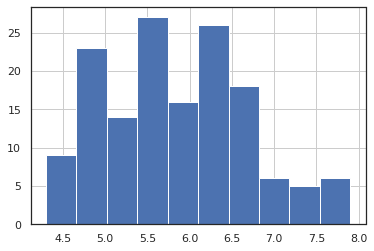

In [ ]:
iris['SepalLengthCm'].hist()

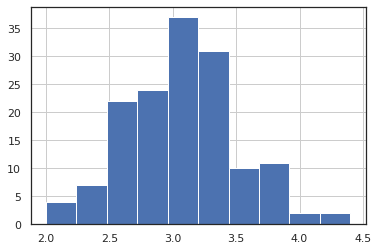

In [ ]:
iris['SepalWidthCm'].hist()

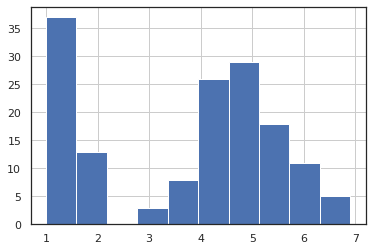

In [ ]:
iris['PetalLengthCm'].hist()

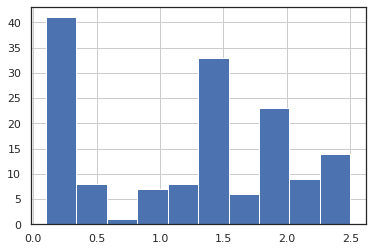

In [ ]:
iris['PetalWidthCm'].hist()

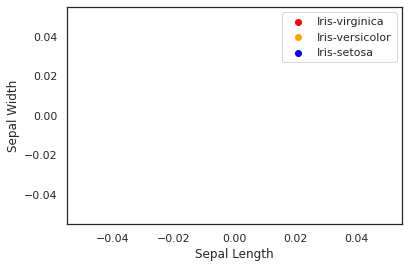

In [ ]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']
for i in range(3):
  x = iris[iris['Species'] == species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [ ]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.117570,0.871754,0.817941,0.782561
SepalWidthCm,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
PetalLengthCm,0.871754,-0.428440,1.000000,0.962865,0.949035
PetalWidthCm,0.817941,-0.366126,0.962865,1.000000,0.956547
Species,0.782561,-0.426658,0.949035,0.956547,1.000000


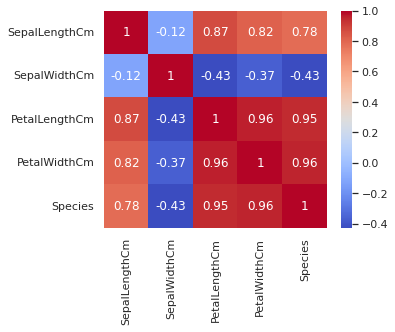

In [ ]:
# Continuing our journey of data exploration, we use a correlation matrix
# This essentially measures how much relation different features have with one another
# Red refers to highly correlated data, while blue refers to data with little correlation with one another
corr = iris.corr()
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

In [ ]:
# Here we are encoding our species as numbers e.g. '0' instead of 'Iris-setosa'
# This makes our dataset much more machine readable and helps us work with the data later on

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#Classification

Train/Test Split

In [ ]:
# Here we split our data apart into two datasets 'training' and 'test'
# This is done so we can measure how effective our classifier is
# A typical split is moving 70% of our dataset into the training set and 30% of our dataset into the test set

from sklearn.model_selection import train_test_split
X = iris.drop(columns=['Species'])
Y = iris['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

##Plotting Tool (Ignore this)

In [ ]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

##Classification Methods

Logistic Regression

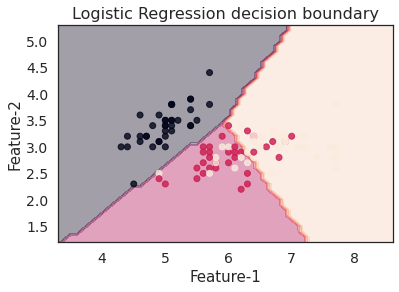

Accuracy:  93.33333333333333


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train) 
#Visualisation
plt.figure()
plt.title("Logistic Regression decision boundary", fontsize=16)
plot_decision_boundaries(x_train, y_train, LogisticRegression)
plt.show()
#performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

K-Nearest Neighbours

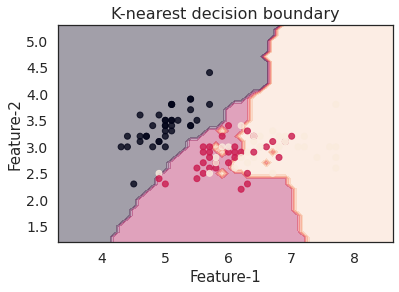

Accuracy:  95.55555555555556


In [ ]:
#K-nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
#Visualisation
plt.figure()
plt.title("K-nearest decision boundary", fontsize=16)
plot_decision_boundaries(x_train, y_train, KNeighborsClassifier)
plt.show()
#performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Decision Tree

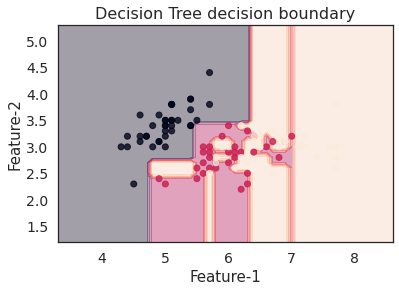

Accuracy:  93.33333333333333


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
#Visualisation
plt.figure()
plt.title("Decision Tree decision boundary", fontsize=16)
plot_decision_boundaries(x_train, y_train, DecisionTreeClassifier)
plt.show()
#performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Support Vector Machine

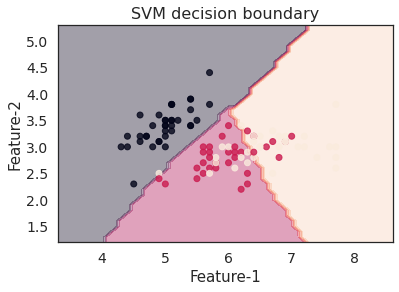

Accuracy:  93.33333333333333


In [ ]:
#Support Vector Machine
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)
#Visualisation
plt.figure()
plt.title("SVM decision boundary", fontsize=16)
plot_decision_boundaries(x_train, y_train, svm.SVC)
plt.show()
#performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Perceptron

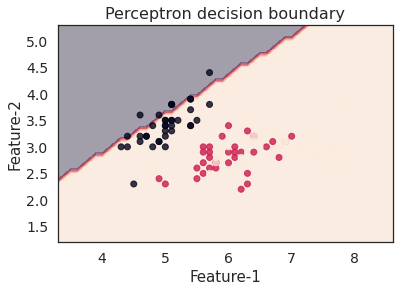

Accuracy:  95.55555555555556


In [ ]:
#Perceptron
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(x_train, y_train)
#Visualisation
plt.figure()
plt.title("Perceptron decision boundary", fontsize=16)
plot_decision_boundaries(x_train, y_train, Perceptron)
plt.show()
#performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Naive Bayes

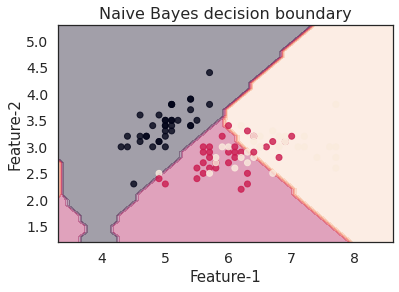

Accuracy:  93.33333333333333


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
#Visualisation
plt.figure()
plt.title("Naive Bayes decision boundary", fontsize=16)
plot_decision_boundaries(x_train, y_train, GaussianNB)
plt.show()
#performance
print("Accuracy: ", model.score(x_test, y_test) * 100)